In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
class TitForTat:
    def __init__(self):
        self.last_opponent_move = None 

    def move(self, opponent_last_move):
        if self.last_opponent_move is None:
            my_move = "C"
        else:
            my_move = self.last_opponent_move
        if opponent_last_move is not None:
            self.last_opponent_move = opponent_last_move
        return my_move

class AlwaysDefect:
    def move(self, opponent_last_move):
        return "D" 
    
#Check
tft_player = TitForTat()
opponent_moves = [None,"C", "C", "D", "C", "D", "D", "C"]
for move in opponent_moves:
    my_move = tft_player.move(move)
    print(f"Player1: {move}, Player2: {my_move}")
print("============")
ad_player = AlwaysDefect()
opponent_moves = ["C", "C", "D", "C", "D", "D", "C"] 
for move in opponent_moves:
    my_move = ad_player.move(move)
    print(f"Player1: {move}, Player2: {my_move}")


Player1: None, Player2: C
Player1: C, Player2: C
Player1: C, Player2: C
Player1: D, Player2: C
Player1: C, Player2: D
Player1: D, Player2: C
Player1: D, Player2: D
Player1: C, Player2: D
Player1: C, Player2: D
Player1: C, Player2: D
Player1: D, Player2: D
Player1: C, Player2: D
Player1: D, Player2: D
Player1: D, Player2: D
Player1: C, Player2: D


In [3]:
class GrimTrigger:
    def __init__(self):
        self.defected_once = False
        self.defect_next_round = False

    def move(self, opponent_last_move):
        if self.defect_next_round:
            self.defected_once = True
        if opponent_last_move == "D":
            self.defect_next_round = True
        else:
            self.defect_next_round = False
        return "D" if self.defected_once else "C"

class AlwaysCooperate:
    def move(self, opponent_last_move):
        return "C" 

#Check
gt_player = GrimTrigger()
opponent_moves = [None,"C", "C", "D", "C", "D", "D", "C"]  
for move in opponent_moves:
    my_move = gt_player.move(move)
    print(f"Player1: {move}, Player2: {my_move}")
print("============")
ac_player = AlwaysCooperate()
opponent_moves = ["C", "C", "D", "C", "D", "D", "C"]  
for move in opponent_moves:
    my_move = ac_player.move(move)
    print(f"Player1: {move}, Player2: {my_move}")



Player1: None, Player2: C
Player1: C, Player2: C
Player1: C, Player2: C
Player1: D, Player2: C
Player1: C, Player2: D
Player1: D, Player2: D
Player1: D, Player2: D
Player1: C, Player2: D
Player1: C, Player2: C
Player1: C, Player2: C
Player1: D, Player2: C
Player1: C, Player2: C
Player1: D, Player2: C
Player1: D, Player2: C
Player1: C, Player2: C


In [4]:
class GenerousTitForTat:
    def __init__(self, forgiveness_prob=0.1):
        self.last_opponent_move = None
        self.forgiveness_prob = forgiveness_prob

    def move(self, opponent_last_move):

        if self.last_opponent_move is None:
            my_move = "C"
        else:
            if self.last_opponent_move == "D":
                if random.random() < self.forgiveness_prob:
                    my_move = "C"
                else:
                    my_move = "D"
            else:
                my_move = "C"
        if opponent_last_move is not None:
            self.last_opponent_move = opponent_last_move

        return my_move

class Adaptive:
    def __init__(self, forgiveness_prob=0.5, betrayal_threshold=1):
        self.defection_count = 0 
        self.defect_next_round = False  
        self.permanently_defect = False  
        self.forgiveness_prob = forgiveness_prob  
        self.betrayal_threshold = betrayal_threshold  
        self.last_opponent_move = None  

    def move(self, opponent_last_move):
        if self.permanently_defect:
            return "D" 

        if self.defect_next_round:
            if self.defection_count > self.betrayal_threshold:
                self.permanently_defect = True 
            self.defect_next_round = False 

        if self.last_opponent_move is None:
            my_move = "C"
        else:
            if self.last_opponent_move == "D":
                if random.random() < self.forgiveness_prob:
                    my_move = "C"
                else:
                    my_move = "D"
            else:
                my_move = "C"

        if opponent_last_move is not None:
            self.last_opponent_move = opponent_last_move

        if opponent_last_move == "D":
            self.defection_count += 1 
            self.defect_next_round = True  

        if self.defection_count > self.betrayal_threshold:
            self.permanently_defect = True

        return my_move

#Check
gtft_player = GenerousTitForTat()
opponent_moves = [None,"C", "C", "D", "C", "D", "C","D", "D", "C"]  
for move in opponent_moves:
    my_move = gtft_player.move(move)
    print(f"Player1: {move}, Player2: {my_move}")
print("============")
adp_player = Adaptive()
opponent_moves = [None,"C", "C", "D", "C", "D", "C","D", "D", "C"]
for move in opponent_moves:
    my_move = adp_player.move(move)
    print(f"Player1: {move}, Player2: {my_move}")

Player1: None, Player2: C
Player1: C, Player2: C
Player1: C, Player2: C
Player1: D, Player2: C
Player1: C, Player2: D
Player1: D, Player2: C
Player1: C, Player2: D
Player1: D, Player2: C
Player1: D, Player2: D
Player1: C, Player2: C
Player1: None, Player2: C
Player1: C, Player2: C
Player1: C, Player2: C
Player1: D, Player2: C
Player1: C, Player2: D
Player1: D, Player2: C
Player1: C, Player2: D
Player1: D, Player2: D
Player1: D, Player2: D
Player1: C, Player2: D



Tournament Overall Results:
TitForTat: 12998 points
GrimTrigger: 12998 points
Adaptive: 12997 points
GenerousTitForTat: 12915 points
AlwaysCooperate: 12000 points
AlwaysDefect: 9368 points


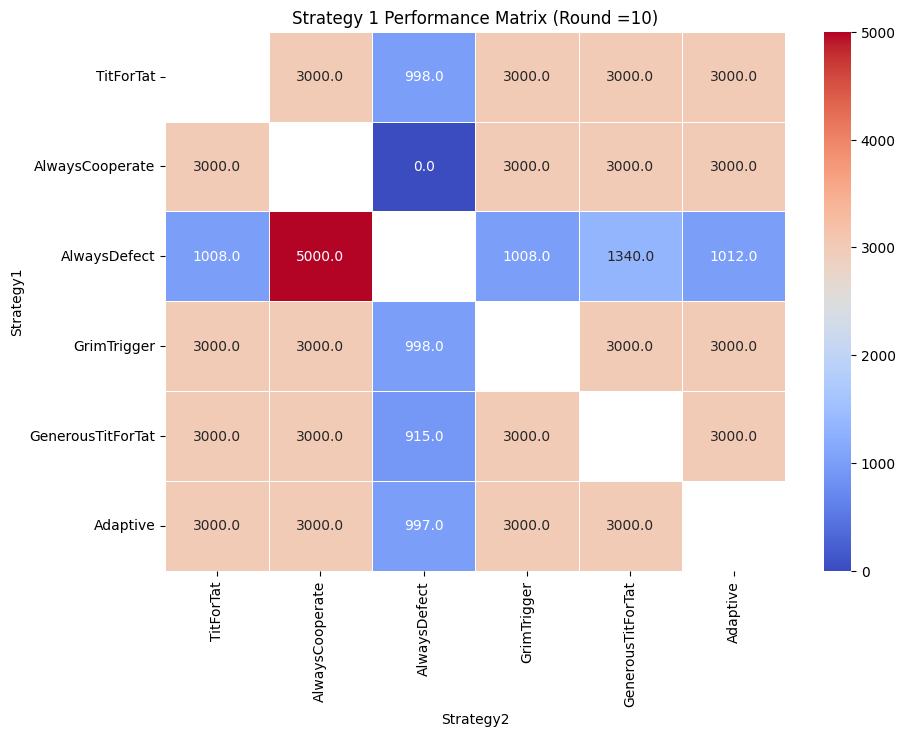

,Strategy1,Strategy2,Score1,Score2
0,TitForTat,AlwaysCooperate,3000,3000
1,AlwaysCooperate,TitForTat,3000,3000
2,TitForTat,AlwaysDefect,998,1008
3,AlwaysDefect,TitForTat,1008,998
4,TitForTat,GrimTrigger,3000,3000
5,GrimTrigger,TitForTat,3000,3000
6,TitForTat,GenerousTitForTat,3000,3000
7,GenerousTitForTat,TitForTat,3000,3000
8,TitForTat,Adaptive,3000,3000
9,Adaptive,TitForTat,3000,3000


In [5]:
PAYOFFS = {
    ("C", "C"): (3, 3),
    ("C", "D"): (0, 5),
    ("D", "C"): (5, 0),
    ("D", "D"): (1, 1),
}

def play_game(strategy1, strategy2, rounds=1000):
    """Plays an iterated PD game between two strategy instances."""
    score1, score2 = 0, 0
    last_move1, last_move2 = None, None

    for _ in range(rounds):
        move1 = strategy1.move(last_move2)
        move2 = strategy2.move(last_move1)
        if hasattr(strategy1, "score_against_opponent"):
            s1, _ = PAYOFFS[(move1, move2)]
            strategy1.score_against_opponent += s1
        if hasattr(strategy2, "score_against_opponent"):
            _, s2 = PAYOFFS[(move1, move2)]
            strategy2.score_against_opponent += s2
        s1, s2 = PAYOFFS[(move1, move2)]
        score1 += s1
        score2 += s2
        last_move1, last_move2 = move1, move2

    return score1, score2


def tournament(strategies, rounds=1000):

    results = {s.__class__.__name__: 0 for s in strategies}
    match_results = []

    for i, s1 in enumerate(strategies):
        for j, s2 in enumerate(strategies):
            if i < j:
                s1_clone = s1.__class__()
                s2_clone = s2.__class__()

                score1, score2 = play_game(s1_clone, s2_clone, rounds)

                results[s1.__class__.__name__] += score1
                results[s2.__class__.__name__] += score2

                match_results.append([
                    s1.__class__.__name__,
                    s2.__class__.__name__,
                    score1,
                    score2])
                match_results.append([
                    s2.__class__.__name__,
                    s1.__class__.__name__,
                    score2,
                    score1])
                    

    return results, match_results

strategies = [
    TitForTat(),
    AlwaysCooperate(),
    AlwaysDefect(),
    GrimTrigger(),
    GenerousTitForTat(),
    Adaptive()
]

results, match_results = tournament(strategies, rounds=1000)

sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nTournament Overall Results:")
for strategy, score in sorted_results:
    print(f"{strategy}: {score} points")

df_results = pd.DataFrame(match_results, columns=["Strategy1", "Strategy2", "Score1", "Score2"])

pivot_table = df_results.pivot(index="Strategy1", columns="Strategy2", values="Score1")
unique_strats = df_results["Strategy1"].unique()
pivot_table = pivot_table.reindex(index=unique_strats, columns=unique_strats)
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title("Strategy 1 Performance Matrix (Round =10)")
plt.show()
df_results

